In [10]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

# Formation energy as  chemical potential vary


 #### Total Energies in eV

In [15]:

E0=-11861391.302574463 # pristine
E1=-11872270.607507527 # addon S
E2=-11850507.509367829 # mono S vacancy
E3=-11839623.889401967 # di S vacancy up&down
E4=-11839622.665039312 # di S vacancy neighboring
E5=-11408691.435644289 # mono W vacancy
E_WS2=-474455.649887723 # primtitive
#ES8=-10879.736195389734*8   #8 atoms in unitcell of S8 ring
ES8=-87044.115400996
#EW=-452700.23153344775*2 # W BCC
EW=-905383.942187897

#ES8=-87031.629750345    #8 atoms in unitcell
mu_S8=ES8/8
#EW=-905397.333160509 # Total energy in eV
mu_Wbcc=EW/2



 ## $$ E^{d}_{f}=E_{defect}(n_{i}+\Delta n_{i})-E_{pristine}(n_{i}) - \sum_{i} \Delta n_{i} \mu_{i} $$
 
## $$  E^{Bulk}_{WS_{2}}-2\mu_{S_{8}} \leq \mu_{W} \leq \mu^{Bulk}_{W} $$
## $$ \frac{1}{2}(E_{WS_{2}}-\mu^{Bulk}_{W})\leq \mu_{S} \leq \mu_{S_{8}} $$


In [16]:
mu_S0_i=0.5*(E_WS2-mu_Wbcc)
mu_W_i=E_WS2-2*mu_S0_i
#print(mu_S0_i)
print(mu_W_i)
#mu_W_f=mu_Wbcc
mu_S0_f=mu_S8
mu_W_f=E_WS2-2*mu_S0_f
#print(mu_S0_f)
print(mu_W_f)
mu_S0=arange(mu_S0_i,mu_S0_f,0.02)
mu_W0=arange(mu_W_f,mu_W_i,0.02)
print(mu_W0)

-452691.9710939485
-452694.62103747396
[-452694.62103747 -452694.60103747 -452694.58103747 -452694.56103747
 -452694.54103747 -452694.52103747 -452694.50103747 -452694.48103747
 -452694.46103747 -452694.44103747 -452694.42103747 -452694.40103747
 -452694.38103747 -452694.36103747 -452694.34103747 -452694.32103747
 -452694.30103747 -452694.28103747 -452694.26103747 -452694.24103747
 -452694.22103747 -452694.20103747 -452694.18103747 -452694.16103747
 -452694.14103747 -452694.12103747 -452694.10103747 -452694.08103747
 -452694.06103747 -452694.04103747 -452694.02103747 -452694.00103747
 -452693.98103747 -452693.96103747 -452693.94103747 -452693.92103747
 -452693.90103747 -452693.88103747 -452693.86103747 -452693.84103747
 -452693.82103747 -452693.80103747 -452693.78103747 -452693.76103747
 -452693.74103747 -452693.72103747 -452693.70103747 -452693.68103747
 -452693.66103747 -452693.64103747 -452693.62103747 -452693.60103747
 -452693.58103747 -452693.56103747 -452693.54103747 -452693.5210

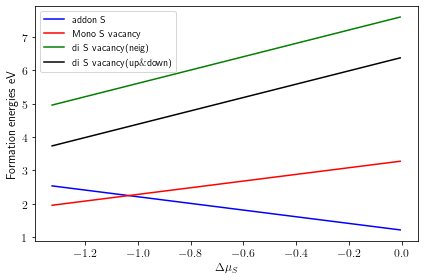

In [17]:
Ef_addS =[] 
Ef_VS = []
Ef_VS2 =[]
Ef_VS22=[]
Ef_W=[]

for i in mu_S0:
    Ef_addS.append(E1-E0-i) 
    Ef_VS.append(E2-E0+i)
    Ef_VS2.append(E3-E0+2*i) 
    Ef_VS22.append(E4-E0+2*i)
 
for j in mu_W0:
    Ef_W.append(E5-E0+j)

plt.plot(mu_S0-mu_S0_f,Ef_addS,'b', label='addon S') 
plt.plot(mu_S0-mu_S0_f,Ef_VS,'r', label='Mono S vacancy') 
plt.plot(mu_S0-mu_S0_f,Ef_VS22, 'g', label='di S vacancy(neig)') 
plt.plot(mu_S0-mu_S0_f,Ef_VS2, 'k', label=r'di S vacancy(up$\&$down)') 


plt.xlabel(r'$\Delta \mu_S$', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#

plt.savefig('Ef_muS.pdf')
#print(Ef_addS)
plt.show()


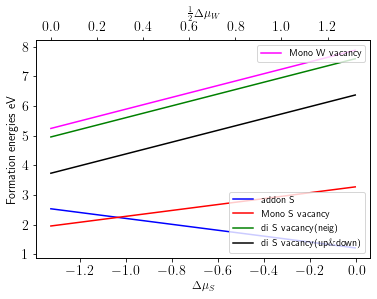

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)



ax1.plot(mu_S0-mu_S0_f,Ef_addS,'b', label='addon S') 
ax1.plot(mu_S0-mu_S0_f,Ef_VS,'r', label='Mono S vacancy') 
ax1.plot(mu_S0-mu_S0_f,Ef_VS22, 'g', label='di S vacancy(neig)') 
ax1.plot(mu_S0-mu_S0_f,Ef_VS2, 'k', label=r'di S vacancy(up$\&$down)') 

ax1.set_xlabel(r'$\Delta \mu_{S}$', fontsize=12)
ax1.set_ylabel('Formation energies eV', fontsize=12)

#ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.19),
#          fancybox=True, shadow=True, ncol=5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2 = ax1.twiny()
ax2.plot((mu_W0-mu_W_f)/2,Ef_W, 'magenta', label='Mono W vacancy') 
ax2.set_xlabel(r'$\frac{1}{2}\Delta \mu_{W}$', fontsize=12)

#ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
#          ncol=3, fancybox=True, shadow=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#
ax1.legend(loc=4)
ax2.legend(loc=1)

#plt.tight_layout()
plt.savefig('Ef_mu_all.png',  bbox_inches="tight",dpi=400)
plt.savefig('Ef_mu_all.pdf')

plt.show()

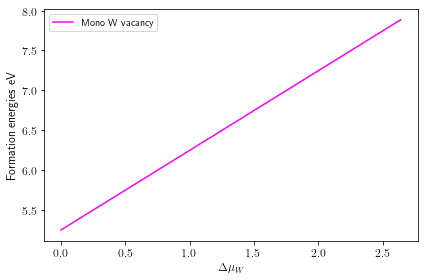

In [19]:
plt.plot(mu_W0-mu_W_f,Ef_W, 'magenta', label='Mono W vacancy') 
#plt.plot(T, VMo, 'yellow', label='Mono Mo vacany') 
plt.xlabel(r'$\Delta \mu_{W}$', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#
plt.savefig('Ef_muMo.pdf')
plt.show()   